In [1]:
#!pip install patchify

In [62]:
#https://www.kaggle.com/datasets/humansintheloop/semantic-segmentation-of-aerial-imagery

In [2]:
import os
import cv2
import random
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random
import jovian

In [67]:
!dir "C:\Users\Shaon\Downloads\Semantic segmentation dataset-20240502T133559Z-001\Semantic segmentation dataset"

 Volume in drive C has no label.
 Volume Serial Number is 506D-BDED

 Directory of C:\Users\Shaon\Downloads\Semantic segmentation dataset-20240502T133559Z-001\Semantic segmentation dataset

05/02/2024  07:36 PM    <DIR>          .
05/02/2024  07:36 PM    <DIR>          ..
05/02/2024  07:36 PM               548 classes.json
05/02/2024  07:36 PM    <DIR>          Tile 1
05/02/2024  07:36 PM    <DIR>          Tile 2
05/02/2024  07:36 PM    <DIR>          Tile 3
05/02/2024  07:36 PM    <DIR>          Tile 4
05/02/2024  07:36 PM    <DIR>          Tile 5
05/02/2024  07:36 PM    <DIR>          Tile 6
05/02/2024  07:36 PM    <DIR>          Tile 7
05/02/2024  07:36 PM    <DIR>          Tile 8
               1 File(s)            548 bytes
              10 Dir(s)  173,890,699,264 bytes free


In [68]:
dataset_root_folder = 'C:\\Users\\Shaon\\Downloads\\Semantic segmentation dataset-20240502T133559Z-001\\Semantic segmentation dataset'

In [69]:
for path, subdires, files in os.walk(dataset_root_folder):
  dir_name=path.split(os.path.sep)[-1]
  print(dir_name)

Semantic segmentation dataset
Tile 1
images
masks
Tile 2
images
masks
Tile 3
images
masks
Tile 4
images
masks
Tile 5
images
masks
Tile 6
images
masks
Tile 7
images
masks
Tile 8
images
masks


In [6]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks': # 'images
    images = os.listdir(path)
    print(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.png')): # '.jpg
        #print(image_name)
        a = True

C:\Users\Shaon\Downloads\Semantic segmentation dataset-20240502T133559Z-001\Semantic segmentation dataset\Tile 1\masks
C:\Users\Shaon\Downloads\Semantic segmentation dataset-20240502T133559Z-001\Semantic segmentation dataset\Tile 2\masks
C:\Users\Shaon\Downloads\Semantic segmentation dataset-20240502T133559Z-001\Semantic segmentation dataset\Tile 3\masks
C:\Users\Shaon\Downloads\Semantic segmentation dataset-20240502T133559Z-001\Semantic segmentation dataset\Tile 4\masks
C:\Users\Shaon\Downloads\Semantic segmentation dataset-20240502T133559Z-001\Semantic segmentation dataset\Tile 5\masks
C:\Users\Shaon\Downloads\Semantic segmentation dataset-20240502T133559Z-001\Semantic segmentation dataset\Tile 6\masks
C:\Users\Shaon\Downloads\Semantic segmentation dataset-20240502T133559Z-001\Semantic segmentation dataset\Tile 7\masks
C:\Users\Shaon\Downloads\Semantic segmentation dataset-20240502T133559Z-001\Semantic segmentation dataset\Tile 8\masks


In [7]:
image_patch_size = 256

In [8]:
image_path = f'{dataset_root_folder}/Tile 2/images/image_part_001.jpg'
image = cv2.imread(image_path, 1)

In [9]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
print(image_patches.shape)
print()
print(image_patches.shape[0])

(2, 1, 1, 256, 256, 3)

2


In [10]:
#using min max scaler
minmaxscaler = MinMaxScaler()

image_x = image_patches[0,0,:,:]
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [11]:
image_y[0].shape

(256, 256, 3)

In [12]:
image_patches

array([[[[[[ 57,  72,  81],
           [ 50,  65,  74],
           [ 72,  84,  94],
           ...,
           [186, 186, 186],
           [224, 227, 225],
           [214, 215, 211]],

          [[ 53,  67,  79],
           [ 60,  75,  84],
           [ 82,  94, 106],
           ...,
           [148, 148, 148],
           [216, 217, 215],
           [202, 203, 201]],

          [[ 67,  78,  92],
           [101, 113, 125],
           [107, 116, 130],
           ...,
           [114, 114, 114],
           [221, 222, 220],
           [173, 174, 172]],

          ...,

          [[ 97,  98, 108],
           [ 72,  73,  83],
           [ 74,  74,  86],
           ...,
           [ 65,  66,  76],
           [ 70,  72,  83],
           [ 71,  71,  83]],

          [[ 92,  91, 100],
           [ 88,  90,  98],
           [ 95,  96, 106],
           ...,
           [ 74,  75,  85],
           [ 38,  40,  51],
           [  0,   0,  10]],

          [[ 86,  86,  92],
           [ 79,  79,  85]

In [13]:
print(type(image))

<class 'numpy.ndarray'>


In [14]:
image

array([[[ 57,  72,  81],
        [ 50,  65,  74],
        [ 72,  84,  94],
        ...,
        [ 77,  85, 115],
        [ 77,  86, 124],
        [ 76,  87, 131]],

       [[ 53,  67,  79],
        [ 60,  75,  84],
        [ 82,  94, 106],
        ...,
        [ 83,  88, 119],
        [ 76,  85, 123],
        [ 69,  80, 124]],

       [[ 67,  78,  92],
        [101, 113, 125],
        [107, 116, 130],
        ...,
        [ 86,  91, 122],
        [ 84,  91, 130],
        [ 79,  88, 132]],

       ...,

       [[111, 107, 102],
        [102,  98,  93],
        [ 85,  81,  76],
        ...,
        [ 97,  91,  96],
        [105, 101, 106],
        [121, 120, 122]],

       [[127, 124, 119],
        [141, 138, 133],
        [135, 133, 125],
        ...,
        [ 99,  93,  98],
        [109, 105, 110],
        [105, 104, 106]],

       [[163, 163, 157],
        [178, 178, 172],
        [159, 157, 149],
        ...,
        [101,  95, 100],
        [111, 107, 112],
        [ 97,  94,  96]]

In [15]:
img = Image.fromarray(image)
print(type(img))

<class 'PIL.Image.Image'>


In [16]:
image.shape

(544, 509, 3)

In [17]:
image.shape[0]

544

In [18]:
image.shape[0]//image_patch_size

2

In [19]:
image.shape[1]//image_patch_size

1

In [20]:
(image.shape[1]//image_patch_size)*image_patch_size

256

In [21]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [22]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root_folder}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)

In [23]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)
     

print(len(image_dataset))
print(len(mask_dataset))

945
945


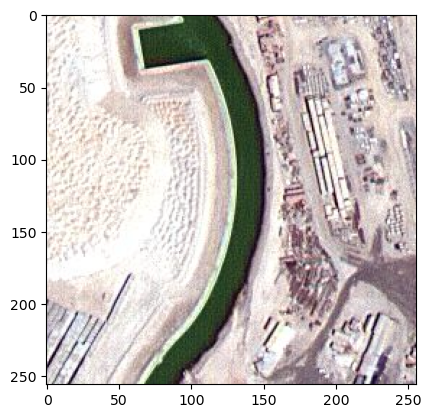

In [24]:
plt.imshow(image_dataset[0])

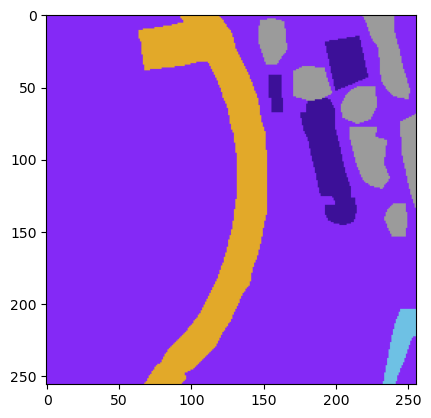

In [25]:
plt.imshow(mask_dataset[0])

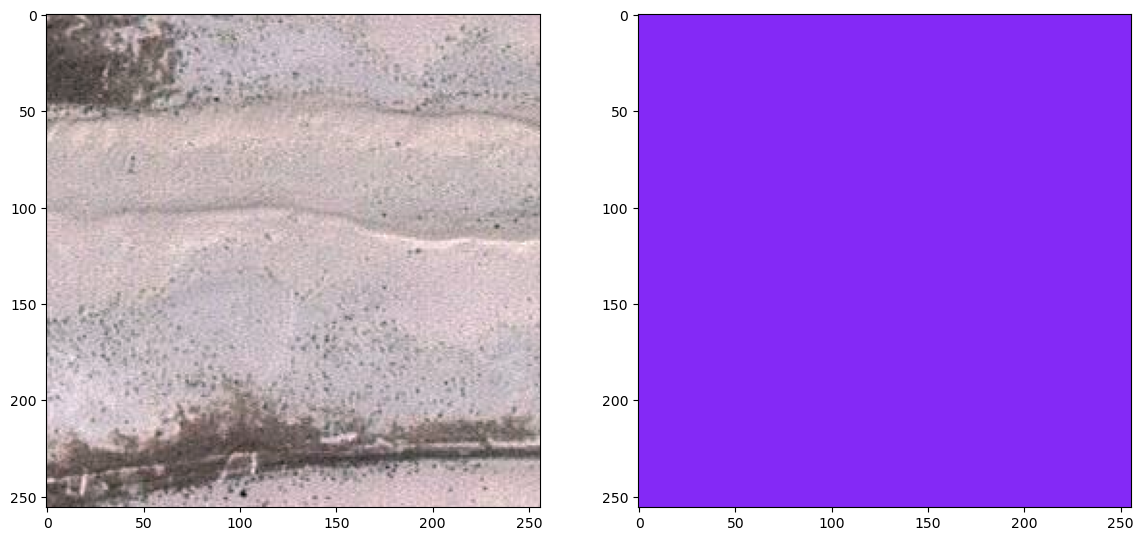

In [26]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [27]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [28]:
label = individual_patched_mask

def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [29]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)
    
print(len(labels))

945


In [30]:
labels = np.array(labels)
labels[3]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [31]:
labels = np.expand_dims(labels, axis=3)
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

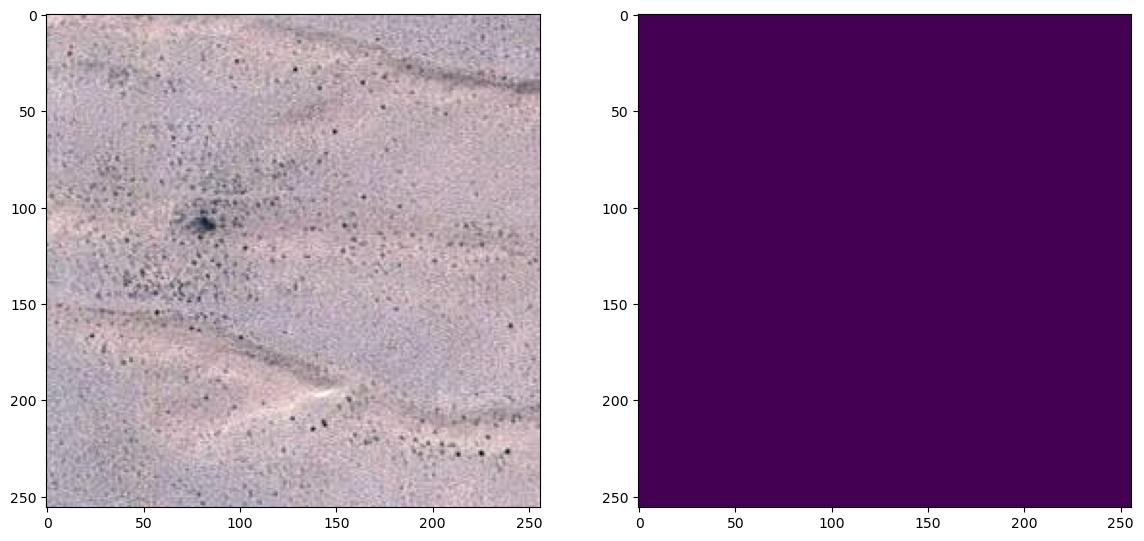

In [32]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [33]:
total_classes = len(np.unique(labels))
total_classes

6

In [34]:
from tensorflow.keras.utils import to_categorical 
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)
master_trianing_dataset = image_dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)
     

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [35]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]
     

print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [36]:
#!pip install -U segmentation-models

In [37]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

import tensorflow as tf
import keras.backend as K

def jaccard_coef(y_true, y_pred):
    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)
    
    intersection = tf.reduce_sum(y_true_flatten * y_pred_flatten)
    union = tf.reduce_sum(y_true_flatten) + tf.reduce_sum(y_pred_flatten) - intersection
    
    final_coef_value = (intersection + 1.0) / (union + 1.0)
    return final_coef_value

In [38]:
def jaccard_coef(y_true, y_pred):
    y_true_flatten = tf.keras.backend.flatten(y_true)
    y_pred_flatten = tf.keras.backend.flatten(y_pred)
    intersection = tf.reduce_sum(y_true_flatten * y_pred_flatten)
    union = tf.reduce_sum(y_true_flatten) + tf.reduce_sum(y_pred_flatten) - intersection
    final_coef_value = (intersection + 1.0) / (union + 1.0)
    return final_coef_value

    def jaccard_coef(y_true, y_pred):
      y_true_flatten = K.flatten(y_true)
      y_pred_flatten = K.flatten(y_pred)
      intersection = K.sum(y_true_flatten * y_pred_flatten)
      final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
      return final_coef_value

In [39]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model

def multi_unet_model(n_classes=6, image_height=256, image_width=256, image_channels=3):
    # Define input layer
    inputs = Input((image_height, image_width, image_channels))

    # Encoder
    c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(inputs)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
    p1 = MaxPooling2D((2,2))(c1)

    c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
    p2 = MaxPooling2D((2,2))(c2)

    c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
    p3 = MaxPooling2D((2,2))(c3)

    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
    p4 = MaxPooling2D((2,2))(c4)

    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

    # Decoder
    u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

    u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

    u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

    u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

    # Output layer
    outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [40]:
metrics = ["accuracy", jaccard_coef]
     
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [41]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes, 
                          image_height=image_height, 
                          image_width=image_width, 
                          image_channels=image_channels)
     

model = get_deep_learning_model()
     

# Please uncomment this line to get model confiuration
#model.get_config()

In [42]:
model = get_deep_learning_model()

# Generating Loss Function

dice loss > Focal Loss > Total Loss

Total Loss = (Dice loss + (1*Focal Loss))

In [43]:
#!pip install --upgrade segmentation-models

In [44]:
#pip install --upgrade efficientnet

In [45]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [46]:
#dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [47]:
#focal_loss = sm.losses.CategoricalFocalLoss()

In [48]:
#total_loss = dice_loss + (1 * focal_loss)

# Model compilation


In [49]:
model = multi_unet_model()
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_38 (Conv2D)            │ (None, 256, 256, 16)      │             448 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_18 (Dropout)          │ (None, 256, 256, 16)      │               0 │ conv2d_38[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_39 (Conv2D)            │ (None, 256, 256, 16)      │           2,320 │ dropout_18[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_8               │ (None, 128, 128, 16)      │               0 │ conv2d_39[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_40 (Conv2D)            │ (None, 128, 128, 32)      │           4,640 │ max_pooling2d_8[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_19 (Dropout)          │ (None, 128, 128, 32)      │               0 │ conv2d_40[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_41 (Conv2D)            │ (None, 128, 128, 32)      │           9,248 │ dropout_19[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_9               │ (None, 64, 64, 32)        │               0 │ conv2d_41[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_42 (Conv2D)            │ (None, 64, 64, 64)        │          18,496 │ max_pooling2d_9[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_20 (Dropout)          │ (None, 64, 64, 64)        │               0 │ conv2d_42[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_43 (Conv2D)            │ (None, 64, 64, 64)        │          36,928 │ dropout_20[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_10              │ (None, 32, 32, 64)        │               0 │ conv2d_43[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_44 (Conv2D)            │ (None, 32, 32, 128)       │          73,856 │ max_pooling2d_10[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_21 (Dropout)          │ (None, 32, 32, 128)       │               0 │ conv2d_44[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_45 (Conv2D)            │ (None, 32, 32, 128)       │         147,58

 Total params: 1,941,190 (7.41 MB)

 Trainable params: 1,941,190 (7.41 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model_history = model.fit(X_train, y_train,
                          batch_size=12,
                          verbose=1,
                          learning-rate=.01,
                          epochs=20,
                          validation_data=(X_test, y_test),
                          shuffle=False)

Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 69s 948ms/step - loss: 0.1031 - val_loss: 0.0804
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 62s 924ms/step - loss: 0.0765 - val_loss: 0.0676
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 63s 943ms/step - loss: 0.0657 - val_loss: 0.0641
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 63s 942ms/step - loss: 0.0619 - val_loss: 0.0614
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 67s 997ms/step - loss: 0.0580 - val_loss: 0.0591
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 65s 964ms/step - loss: 0.0535 - val_loss: 0.0548
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 65s 977ms/step - loss: 0.0513 - val_loss: 0.0552
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 63s 945ms/step - loss: 0.0491 - val_loss: 0.0563
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 62s 929ms/step - loss: 0.0476 - val_loss: 0.0520
Epoch 10/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - loss: 0.0451 - val_loss: 0.0493
Epoch 11/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - loss: 0.0440 - val_loss: 0.0507
Epoch 12/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 64s 946m

In [51]:
history_a = model_history
history_a.history

{'loss': [0.08940517902374268,
  0.0725703239440918,
  0.06573215126991272,
  0.061197951436042786,
  0.0574052594602108,
  0.052861399948596954,
  0.050942327827215195,
  0.04878469184041023,
  0.046983636915683746,
  0.04513891786336899,
  0.04399266839027405,
  0.042120885103940964,
  0.04149242863059044,
  0.040649428963661194,
  0.040199290961027145,
  0.039570994675159454,
  0.0389360748231411,
  0.038720156997442245,
  0.03834540769457817,
  0.038294363766908646],
 'val_loss': [0.08039557188749313,
  0.06761498004198074,
  0.0640752986073494,
  0.061432961374521255,
  0.059140611439943314,
  0.05475856736302376,
  0.05516337230801582,
  0.0562746524810791,
  0.05201967433094978,
  0.049275677651166916,
  0.05072404444217682,
  0.05006163939833641,
  0.049281079322099686,
  0.0471595861017704,
  0.05020250752568245,
  0.04812489077448845,
  0.04947346821427345,
  0.04794849455356598,
  0.05065228417515755,
  0.05060902610421181]}

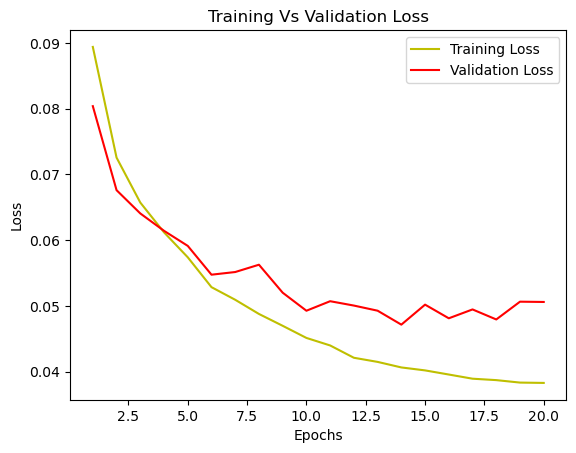

In [52]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [53]:
model_history.params

{'verbose': 1, 'epochs': 20, 'steps': 67}

In [54]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 543ms/step


In [55]:
y_pred

array([[[[1.18369929e-01, 4.09701139e-01, 9.90807563e-02,
          1.56235039e-01, 1.82185560e-01, 3.44274864e-02],
         [8.95655304e-02, 4.73833293e-01, 8.18774775e-02,
          1.70710623e-01, 1.66301236e-01, 1.77118331e-02],
         [8.10372233e-02, 4.75586951e-01, 8.42056721e-02,
          1.73612371e-01, 1.71656504e-01, 1.39013110e-02],
         ...,
         [8.12726170e-02, 4.67105210e-01, 1.95284665e-01,
          1.02379344e-01, 1.37017488e-01, 1.69406757e-02],
         [1.02724537e-01, 4.04775888e-01, 1.79381669e-01,
          1.00353226e-01, 1.86744422e-01, 2.60202140e-02],
         [1.07970871e-01, 3.39913607e-01, 1.83383569e-01,
          1.23302668e-01, 1.95436507e-01, 4.99928594e-02]],

        [[6.38389513e-02, 4.60105270e-01, 1.12548091e-01,
          1.37418553e-01, 2.06182182e-01, 1.99068822e-02],
         [3.76787782e-02, 6.09285235e-01, 8.17412212e-02,
          1.16740592e-01, 1.50811046e-01, 3.74312489e-03],
         [2.60599069e-02, 6.25459492e-01, 6.8259

In [56]:
y_pred_argmax = np.argmax(y_pred, axis=3)
y_pred_argmax

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 4, 4, 4],
        [0, 0, 0, ..., 4, 4, 4],
        [0, 0, 0, ..., 4, 4, 4],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[4, 1, 2, ..., 1, 1, 1],
        [2, 1, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [4, 1, 1, ..., 2, 2, 2],
        [4, 1, 1, ..., 2, 2, 2],
        [4, 1, 1, ..., 2, 2, 2]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 0, 0, 1],
        ...,
        [0, 0, 0, ..., 

In [57]:
y_test_argmax = np.argmax(y_test, axis=3)
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [58]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


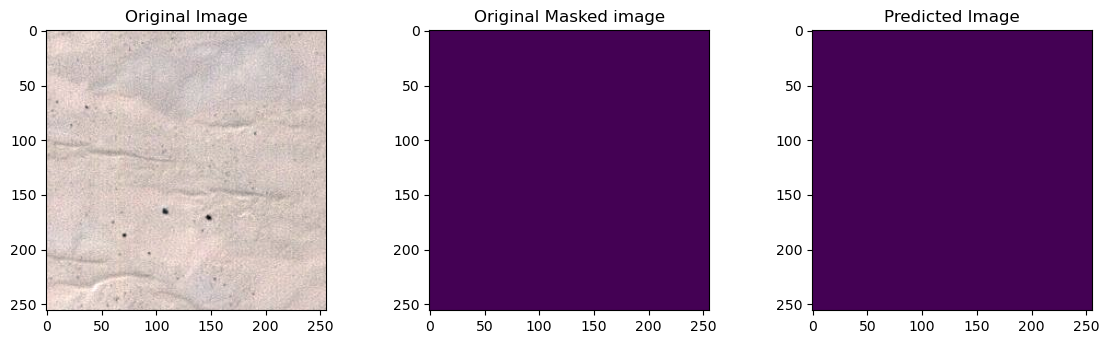

In [78]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

from ultralytics import NAS

 Load the pre-trained YOLO-NAS L model
model_l = NAS('yolo_nas_l.pt')

 Validate the model on the COCO8 dataset (optional)
results_l = model_l.val(data='coco8.yaml')

 Run inference with the YOLO-NAS L model on an image
results_l = model_l('path/to/image.jpg')


===========================================
from ultralytics import NAS

#Load the pre-trained YOLO-NAS L INT-8 model
model_int8 = NAS('yolo_nas_l_int8.pt')

 Validate the model on the COCO8 dataset (optional)
results_int8 = model_int8.val(data='coco8.yaml')

 Run inference with the YOLO-NAS L INT-8 model on an image
results_int8 = model_int8('path/to/image.jpg')


In [6]:
from ultralytics import NAS
model_l = NAS('yolo_nas_l.pt')

ModuleNotFoundError: No module named 'super_gradients'

In [63]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "samirkhan993366/satellite-imagery-deeplearning" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/samirkhan993366/satellite-imagery-deeplearning


'https://jovian.com/samirkhan993366/satellite-imagery-deeplearning'